# Bike Prediction

## Define the Business Goal

Goal: Build a regression model to predict the number of bike rentals (count) using various features from the dataset.

## Explore the Data

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('Bike_train.csv')
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


## Preprocess the Data

In [29]:
data['datetime'] = pd.to_datetime(data['datetime'], errors='coerce')

data['hour'] = data['datetime'].dt.hour
data['month'] = data['datetime'].dt.month
data['day_of_week'] = data['datetime'].dt.dayofweek

data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,month,day_of_week
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,1,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,1,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2,1,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3,1,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4,1,5


In [24]:
data.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'hour', 'month', 'day_of_week'],
      dtype='object')

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   datetime     10886 non-null  datetime64[ns]
 1   season       10886 non-null  int64         
 2   holiday      10886 non-null  int64         
 3   workingday   10886 non-null  int64         
 4   weather      10886 non-null  int64         
 5   temp         10886 non-null  float64       
 6   atemp        10886 non-null  float64       
 7   humidity     10886 non-null  int64         
 8   windspeed    10886 non-null  float64       
 9   casual       10886 non-null  int64         
 10  registered   10886 non-null  int64         
 11  count        10886 non-null  int64         
 12  hour         10886 non-null  int32         
 13  month        10886 non-null  int32         
 14  day_of_week  10886 non-null  int32         
dtypes: datetime64[ns](1), float64(3), int32(3), int64(8)


In [28]:
data.isnull().sum()

datetime       0
season         0
holiday        0
workingday     0
weather        0
temp           0
atemp          0
humidity       0
windspeed      0
casual         0
registered     0
count          0
hour           0
month          0
day_of_week    0
dtype: int64

## Explore the Data

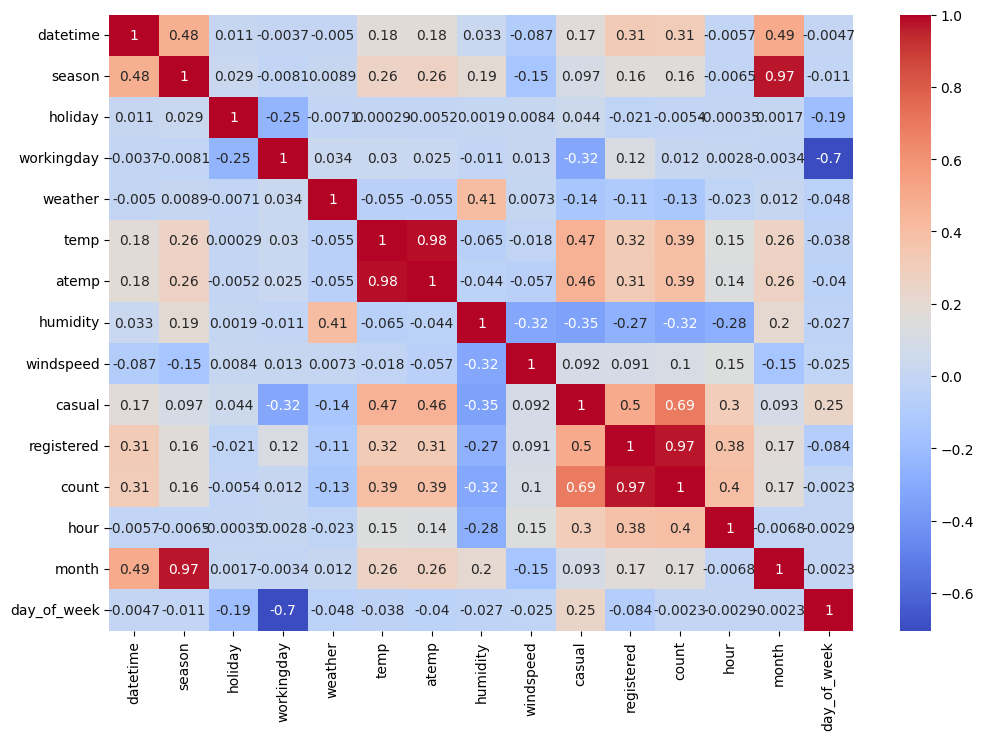

In [38]:
corr = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

## Visualize count against weather, temp, and humidity

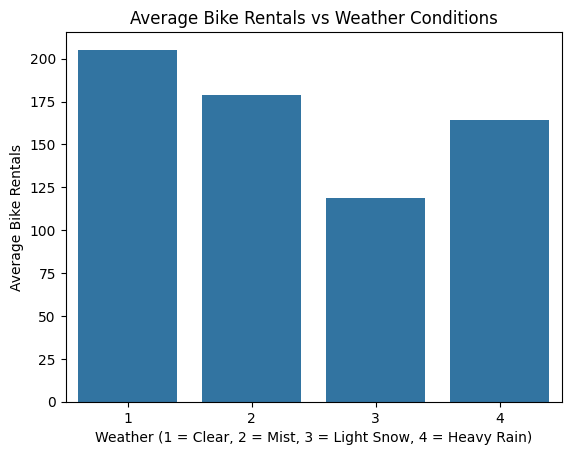

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group by 'weather' and calculate mean bike rentals (count)
weather_demand = data.groupby('weather')['count'].mean().reset_index()

# Bar plot for count vs weather
sns.barplot(x='weather', y='count', data=weather_demand)
plt.title('Average Bike Rentals vs Weather Conditions')
plt.xlabel('Weather (1 = Clear, 2 = Mist, 3 = Light Snow, 4 = Heavy Rain)')
plt.ylabel('Average Bike Rentals')
plt.show()

## Count vs Temperature (Scatter Plot with Regression Line)

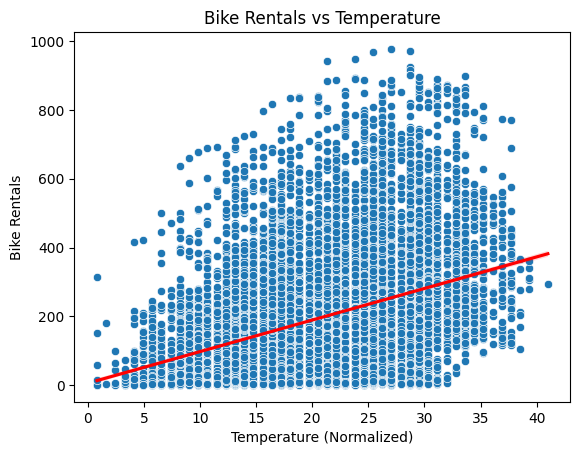

In [17]:
sns.scatterplot(x='temp', y='count', data=data)
sns.regplot(x='temp', y='count', data=data, scatter=False, color='red')  # Add a regression line
plt.title('Bike Rentals vs Temperature')
plt.xlabel('Temperature (Normalized)')
plt.ylabel('Bike Rentals')
plt.show()

## Count vs Humidity (Scatter Plot with Regression Line)

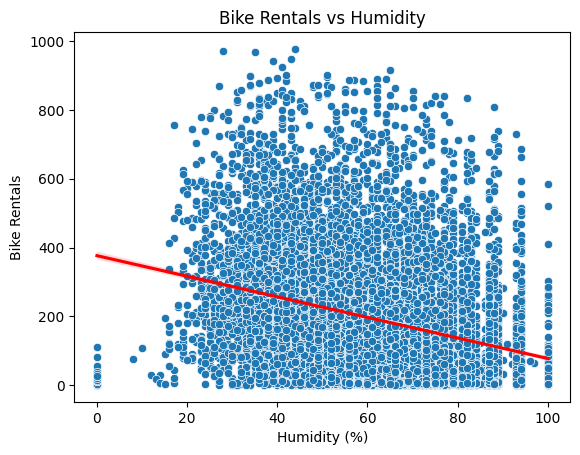

In [18]:
sns.scatterplot(x='humidity', y='count', data=data)
sns.regplot(x='humidity', y='count', data=data, scatter=False, color='red')  # Add a regression line
plt.title('Bike Rentals vs Humidity')
plt.xlabel('Humidity (%)')
plt.ylabel('Bike Rentals')
plt.show()

## Visualize Bike Rentals by Time (Hour, Day of Week, Month)

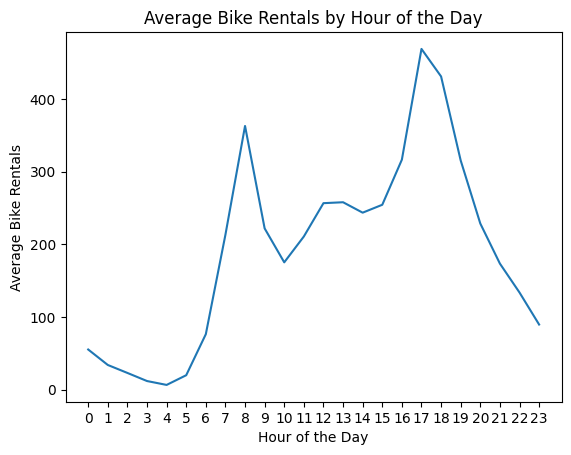

In [19]:
hourly_demand = data.groupby('hour')['count'].mean().reset_index()

# Line plot for bike rentals by hour
sns.lineplot(x='hour', y='count', data=hourly_demand)
plt.title('Average Bike Rentals by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Bike Rentals')
plt.xticks(range(0, 24))  # Show all 24 hours
plt.show()

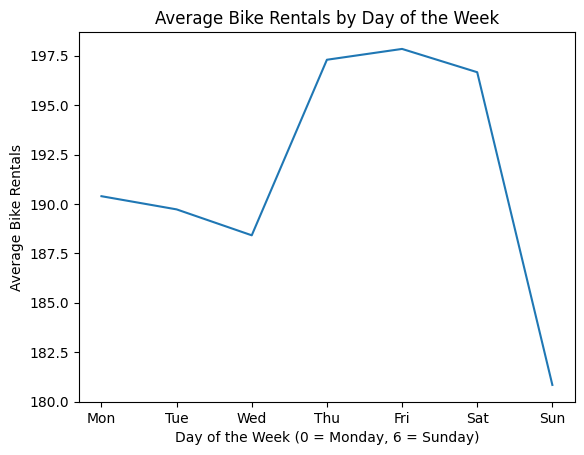

In [20]:
weekly_demand = data.groupby('day_of_week')['count'].mean().reset_index()

# Line plot for bike rentals by day of the week
sns.lineplot(x='day_of_week', y='count', data=weekly_demand)
plt.title('Average Bike Rentals by Day of the Week')
plt.xlabel('Day of the Week (0 = Monday, 6 = Sunday)')
plt.ylabel('Average Bike Rentals')
plt.xticks(range(0, 7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])  # Label the days
plt.show()

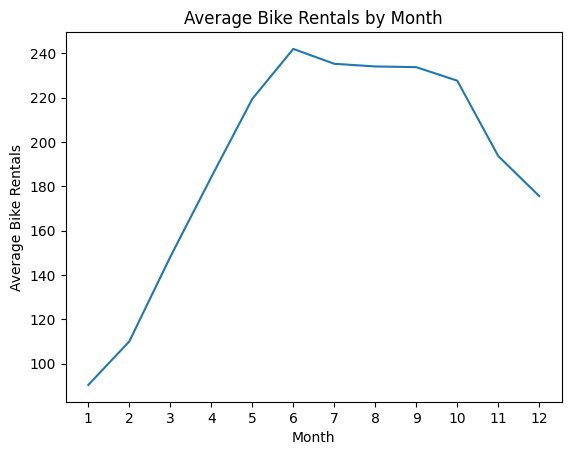

In [21]:
monthly_demand = data.groupby('month')['count'].mean().reset_index()

# Line plot for bike rentals by month
sns.lineplot(x='month', y='count', data=monthly_demand)
plt.title('Average Bike Rentals by Month')
plt.xlabel('Month')
plt.ylabel('Average Bike Rentals')
plt.xticks(range(1, 13))  # Label all 12 months
plt.show()

## Visualize Count by Weather, Day of the Week, and Time of Day

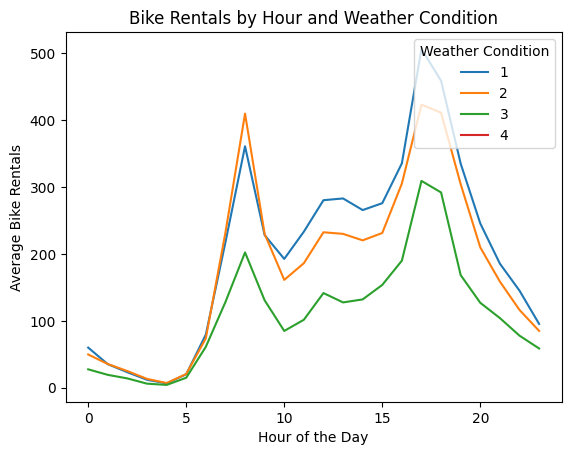

In [22]:
hourly_weather_demand = data.pivot_table(values='count', index='hour', columns='weather', aggfunc='mean')

# Line plot for bike rentals by hour for each weather condition
hourly_weather_demand.plot()
plt.title('Bike Rentals by Hour and Weather Condition')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Bike Rentals')
plt.legend(title='Weather Condition', loc='upper right')
plt.show()

## Train-Test Split

In [11]:
from sklearn.model_selection import train_test_split

X = data.drop(columns=['count', 'casual', 'registered', 'datetime'])
y = data['count']

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)

## Modeling

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(Xtrain, ytrain)
predictions = model.predict(Xtest)
mse = mean_squared_error(ytest, predictions)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 21658.242880327274


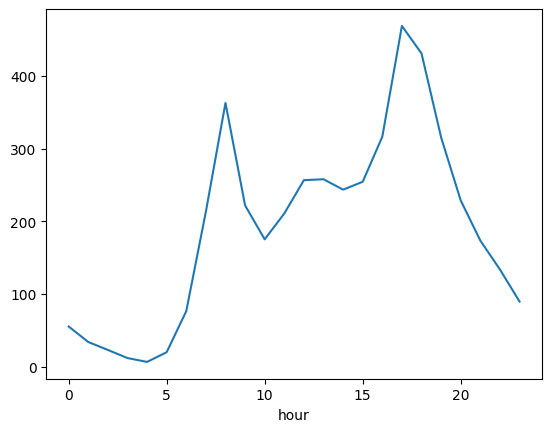

In [14]:
hourly_demand = data.groupby('hour')['count'].mean()
hourly_demand.plot(kind='line')
plt.show()

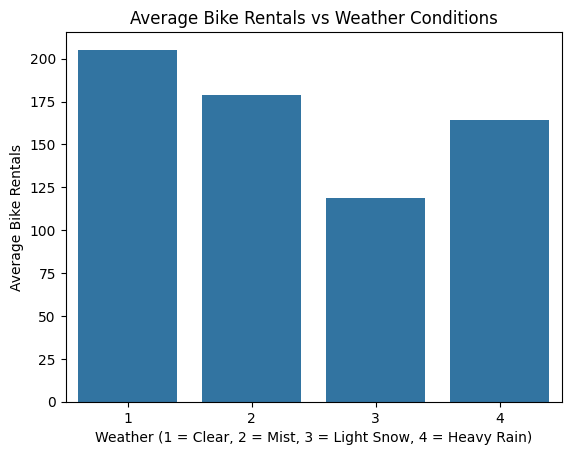

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group by 'weather' and calculate mean bike rentals (count)
weather_demand = data.groupby('weather')['count'].mean().reset_index()

# Bar plot for count vs weather
sns.barplot(x='weather', y='count', data=weather_demand)
plt.title('Average Bike Rentals vs Weather Conditions')
plt.xlabel('Weather (1 = Clear, 2 = Mist, 3 = Light Snow, 4 = Heavy Rain)')
plt.ylabel('Average Bike Rentals')
plt.show()